## 基本用法

In [1]:
import tensorflow as tf
print(tf.__version__)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


1.4.0


### 1.变量，常量

#### 1.1 变量

In [2]:
v1 = tf.Variable(0.1, dtype=tf.float32, name='w1', trainable=False)
v2 = tf.Variable([0.1], dtype=tf.float32, name='w2')
v3 = tf.Variable([[0.1],[0.3]], dtype=tf.float32)
print('v1:', v1)
print('v2:', v2)
print('v3:', v3)

v1: <tf.Variable 'w1:0' shape=() dtype=float32_ref>
v2: <tf.Variable 'w2:0' shape=(1,) dtype=float32_ref>
v3: <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref>


可以看出 变量包含三部分：
- 第一部分是变量命名空间的名称，如‘w1:0'
- 第二部分为shape
- 第三部分是变量的类型

In [3]:
init = tf.global_variables_initializer()#初始化
sess = tf.Session()
sess.run(init)

In [4]:
print('v1', sess.run(v1))
print('v2', sess.run(v2))
print('v3', sess.run(v3))

v1 0.1
v2 [ 0.1]
v3 [[ 0.1       ]
 [ 0.30000001]]


由此可见，变量需要通过sess.run()才能看到值

#### 1.2 常量

In [5]:
c1 = tf.constant([1.0], dtype=tf.float32)
c2 = tf.constant([1.0, 2.0], dtype=tf.float32)
print('c1', c1)
print('c2', c2)

c1 Tensor("Const:0", shape=(1,), dtype=float32)
c2 Tensor("Const_1:0", shape=(2,), dtype=float32)


**NOTICE**:每次创建新的变量和常量都需要初始化之后才能使用

In [6]:
sess = tf.Session()
sess.run(init)

In [7]:
print('c1',sess.run(c1))
print('c2',sess.run(c2))

c1 [ 1.]
c2 [ 1.  2.]


以上为tf中变量和常量的基础用法，而实际在编写网络代码时更多用tf.get_variable()来定义变量&tf.variable_scope()来管理命名空间

#### 1.3 tf.get_variable()

In [8]:
w1 = tf.get_variable(name='w1', shape=[3,4], initializer=tf.truncated_normal_initializer)#使用标准正态分布初始化
b1 = tf.get_variable('b1', [3,1])
print('w1', w1)
print('b1', b1)

w1 <tf.Variable 'w1_1:0' shape=(3, 4) dtype=float32_ref>
b1 <tf.Variable 'b1:0' shape=(3, 1) dtype=float32_ref>


tf.variable()创建变量一般需要提供三个参数：
- name:tf中的变量常量都通过name来区分
- shape:变量的形状
- initializer:初始化函数,具体见https://www.tensorflow.org/api_docs/python/tf/initializers

这里需要注意，再用get_variable()创建变量时，用已经存在的name就会报错

In [9]:
w1_1 = tf.get_variable(name='w1', shape=[1,2])

ValueError: Variable w1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-8-0073e0d42a05>", line 1, in <module>
    w1 = tf.get_variable(name='w1', shape=[3,4], initializer=tf.truncated_normal_initializer)#使用标准正态分布初始化
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):


#### 1.4 example

tf 实现计数器

In [10]:
h_sum = tf.Variable(0.0, dtype=tf.float32)
h_vec = tf.constant([1.0, 2.0, 3.0, 4.0])
#将h_vec 的每个元素加入h_sum中，然后再除10计算平均值

#待添加的数
h_add = tf.placeholder(tf.float32)
#添加之后的值
h_new = tf.add(h_sum, h_add)
#更新操作
update = tf.assign(h_sum, h_new)

sess.run(tf.global_variables_initializer())
print("h_sum = ", sess.run(h_sum))
print("vec = ", sess.run(h_vec))

#循环添加
for i in range(4):
    sess.run(update, feed_dict={h_add: sess.run(h_vec[i])})
    print('round {}: h_vec[{}] = {}, h_sum = {}'.format(i, i, sess.run(h_vec[i]), sess.run(h_sum)))
print('mean is ', sess.run(h_sum) / 4.0)

h_sum =  0.0
vec =  [ 1.  2.  3.  4.]
round 0: h_vec[0] = 1.0, h_sum = 1.0
round 1: h_vec[1] = 2.0, h_sum = 3.0
round 2: h_vec[2] = 3.0, h_sum = 6.0
round 3: h_vec[3] = 4.0, h_sum = 10.0
mean is  2.5


### 2.tf.placeholder和feed使用

dnn中往往每次喂一个batch的数据，tf.placeholder()相当于占坑，数据传输时再填上.feed便是用来填的

In [14]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)
print('input1', input1)
print('input2', input2)
print('output', output)

input1 Tensor("Placeholder_7:0", dtype=float32)
input2 Tensor("Placeholder_8:0", dtype=float32)
output Tensor("Mul_2:0", dtype=float32)


In [15]:
#通过feed来填
_out = sess.run([output], feed_dict={input1:[7.0], input2:[2.0]})
print(_out)

[array([ 14.], dtype=float32)]


### 3.ML Example

#### 3.1 平面拟合

使用机器学习解决问题的一般过程：
- 准备数据
- 构造模型&设置求解的目标函数
- 求解模型(train&test)

In [16]:
import tensorflow as tf
import numpy as np

sess= tf.Session()

#1.准备数据：使用numpy生成假数据，共100个点
X = np.float32(np.random.rand(100)) #随机输入
print(X)
X = np.sort(X)
print(X)
y = np.dot(0.200, X**2) + 0.300 + np.random.randn(100) * 0.01 #np.dot 矩阵乘法，
X = X.reshape([-1, 1])
y = y.reshape([-1, 1])
print('X.shape =', X.shape)
print('y.shape =', y.shape)

[ 0.77463984  0.12427549  0.21493888  0.04388439  0.49474135  0.75404918
  0.87462831  0.03057274  0.85466731  0.18337816  0.32689741  0.66911238
  0.26339647  0.42921576  0.83693451  0.47812223  0.2994943   0.13148302
  0.99540311  0.98757297  0.18190409  0.6973896   0.20798697  0.45083043
  0.67495275  0.40893334  0.01125957  0.1093651   0.20595351  0.37245834
  0.50506932  0.7317034   0.26473927  0.63700938  0.24567333  0.31191087
  0.64820659  0.78603238  0.77190173  0.52152503  0.0597645   0.69885945
  0.68638712  0.09531285  0.23383185  0.2910485   0.76266712  0.72703564
  0.53062725  0.06330738  0.64461118  0.49507803  0.7720443   0.82203037
  0.35939887  0.21943769  0.69484264  0.66776341  0.04788187  0.89234167
  0.76629901  0.76475036  0.34932181  0.0314347   0.55159682  0.54348516
  0.65671158  0.11940552  0.29468071  0.92195159  0.76771116  0.27528629
  0.11515832  0.37447324  0.41562486  0.33574048  0.53600216  0.71561396
  0.69844222  0.4714956   0.14013027  0.85973853  0

In [18]:
#2. 构造一个线性模型
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0))
y_pre = tf.matmul(X**2, W) + b

#3. 求解模型
loss = tf.reduce_mean(tf.square(y_pre - y))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

#迭代，反复执行上面的最小化损失这一操作，拟合平面
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [[-0.0896578]] [ 0.44933394]
20 [[ 0.1290296]] [ 0.3258206]
40 [[ 0.18262632]] [ 0.30762964]
60 [[ 0.19491877]] [ 0.30345753]
80 [[ 0.19773805]] [ 0.30250067]
100 [[ 0.19838469]] [ 0.30228117]
120 [[ 0.19853298]] [ 0.30223083]
140 [[ 0.19856699]] [ 0.3022193]
160 [[ 0.19857481]] [ 0.30221665]
180 [[ 0.19857657]] [ 0.30221605]
200 [[ 0.19857697]] [ 0.30221593]


In [19]:
y_pre = sess.run(y_pre)
print('y_pre', y_pre.reshape([-1])[:20]) #预测值
print('y_true', y.reshape([-1])[:20]) #真实值

y_pre [ 0.30224112  0.30240154  0.30241215  0.30259836  0.3026638   0.30267119
  0.3029252   0.3030118   0.30328974  0.30401993  0.30459106  0.30484936
  0.30504718  0.30528283  0.30564889  0.3061153   0.30878666  0.30889359
  0.30955988  0.31063893]
y_true [ 0.31878539  0.30582031  0.28289691  0.31312334  0.30960403  0.28251431
  0.30074264  0.30232127  0.30203441  0.29258152  0.30699657  0.31030724
  0.31071554  0.30298029  0.29123751  0.31766751  0.30515979  0.30621001
  0.31399816  0.31193745]


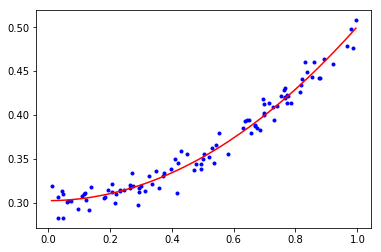

In [20]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.plot(X, y_pre, 'r-')
plt.show()